<a href="https://colab.research.google.com/github/melihkurtaran/MachineLearning/blob/main/FFNN%26RBFNN/FFNN%26RBFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computational Intelligence - Feed-forward Neural Networks (FFNN) &
Radial Basis Functions Neural Networks (RBFNN)**

The dataset for this project consists of electrocardiogram signals (ECG) of heartbeats for the normal case (class label 0) and
four more cases affected by different arrhythmia and myocardial infarction (class labels 1 to 4). These signals
have been preprocessed and segmented, so that each segment is a heartbeat, and correspondingly one sample of
the dataset, which, in turn, consists of signal values for 187 time instants. Figure 1 shows one example for each
class

In [60]:
#Load libraries
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
#Connect to GitHub for faster access
!git clone https://github.com/melihkurtaran/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 70 (delta 34), reused 39 (delta 15), pack-reused 0
Unpacking objects: 100% (70/70), done.


Read datasets

In [25]:
# Define the path to the datasets folder
folder = "MachineLearning/FFNN&RBFNN/datasets-nn/"

#defining a function to read files to datafame
def load_data(group, split, task):
    """Load the dataset for a given group, split, and task.

    Parameters:
        group (int): The group number.
        split (int): The split number.
        task (int): The task number (either 1 or 2).
    
    Returns:
        tuple: A tuple containing the training data (X_train, y_train) and the
            test data (X_test, y_test).
    """

    # Load the data for the given task and split
    data = pd.read_csv(folder + f'ds{task}-{group:02d}-{split}-nn-tr.csv')
    X_train = data.iloc[:, :-1].to_numpy()
    y_train = data.iloc[:, -1].to_numpy()
    data = pd.read_csv(folder + f'ds{task}-{group:02d}-{split}-nn-te.csv')
    X_test = data.iloc[:, :-1].to_numpy()
    y_test = data.iloc[:, -1].to_numpy()

    #printing only X for simplicity
    print(f'X_train_{task}_{group:02d}_sp{split} is created, size is {len(X_train)}')
    print(f'X_test_{task}_{group:02d}_sp{split} is created, size is {len(X_test)}')

    return (X_train, y_train), (X_test, y_test)

My group number is 11 and there are 3 splits

In [26]:
(X_train_1_sp1, y_train_1_sp1), (X_test_1_sp1, y_test_1_sp1) = load_data(11, 1, 1)
(X_train_1_sp2, y_train_1_sp2), (X_test_1_sp2, y_test_1_sp2) = load_data(11, 2, 1)
(X_train_1_sp3, y_train_1_sp3), (X_test_1_sp3, y_test_1_sp3) = load_data(11, 3, 1)

(X_train_2_sp1, y_train_2_sp1), (X_test_2_sp1, y_test_2_sp1) = load_data(11, 1, 2)
(X_train_2_sp2, y_train_2_sp2), (X_test_2_sp2, y_test_2_sp2) = load_data(11, 2, 2)
(X_train_2_sp3, y_train_2_sp3), (X_test_2_sp3, y_test_2_sp3) = load_data(11, 3, 2)

X_train_1_11_sp1 is created, size is 2503
X_test_1_11_sp1 is created, size is 1252
X_train_1_11_sp2 is created, size is 2503
X_test_1_11_sp2 is created, size is 1252
X_train_1_11_sp3 is created, size is 2504
X_test_1_11_sp3 is created, size is 1251
X_train_2_11_sp1 is created, size is 2666
X_test_2_11_sp1 is created, size is 1334
X_train_2_11_sp2 is created, size is 2667
X_test_2_11_sp2 is created, size is 1333
X_train_2_11_sp3 is created, size is 2667
X_test_2_11_sp3 is created, size is 1333


Visualizing one random sample electrocardiogram signal

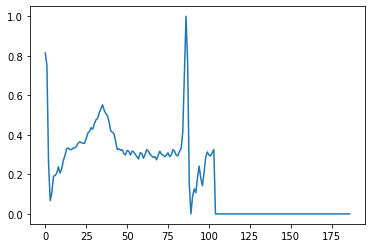

In [34]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data as a line
ax.plot(X_train_1_sp1[784])

# Show the plot
plt.show()

A simple value count check for classes in one split of training data

In [45]:
# Count the occurrences of each value
counts = Counter(y_train_1_sp1)

# Print the counts of each value
for value, count in counts.items():
    print(f"Class {value}, count: {count}")

Class 0, count: 500
Class 1, count: 501
Class 2, count: 501
Class 3, count: 500
Class 4, count: 501


# **T1 - Design and evaluate an FFNN**

an FFNN is developed to solve the multi-class classification problem

In [ ]:
# Assign the split
X_train = X_train_1_sp1
y_train = y_train_1_sp1

# Initialize the weights
initializer = keras.initializers.HeNormal()

# Define the model's input and output layers
inputs = keras.Input(shape=(len(X_train[0]),))
x1 = layers.Dense(5, activation="sigmoid", kernel_initializer=initializer)(inputs)
x2 = layers.Dense(5, activation="sigmoid", kernel_initializer=initializer)(x1)
outputs = layers.Dense(1, activation="softmax", kernel_initializer=initializer)(x2)

# Create the model
model = keras.Model(inputs, outputs)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='RMSprop', loss="categorical_crossentropy", metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)
